**Shraddha Indulkar**

**Task 2: Predicting the species of flower using the IRIS dataset**

**Using K-means clustering to predict species based on Sepal length, Sepal width, Petal Length, Petal width**

**Importing relevant libraries** 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 

**Uploading our required dataset**

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Iris.csv to Iris.csv


**Dropping the index colum as it is irrelevant and displaying our dataset**

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv'])) 
df.drop('Id', axis=1, inplace= True)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


**Data Cleaning**

*First we will check if there are any null values*


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Since there are no null values, we can proceed with the data visualization for prediction**

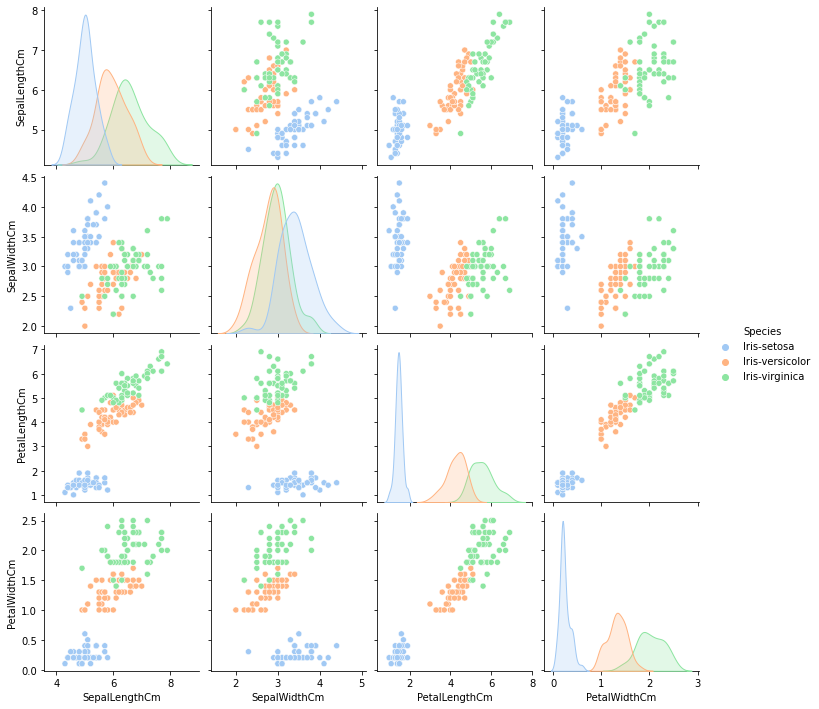

In [ ]:
sns.pairplot(df, hue="Species", palette="pastel")
plt.show()

**Finding the best value of K**

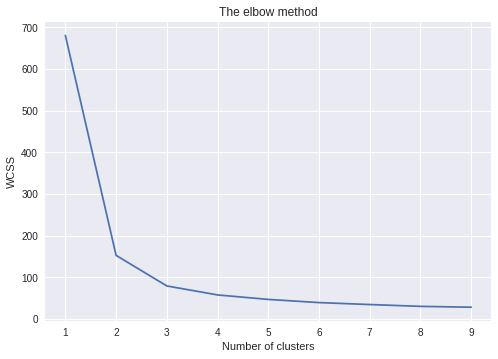

In [ ]:
from sklearn.cluster import KMeans
X = df.iloc[:,:-1].values
wcss=[]
for i in range(1,10):
  knn=KMeans(i)
  knn.fit(X)
  wcss.append(knn.inertia_)
plt.style.use("seaborn")
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**It is evident from the visualization that the optimum value of K=3**

**Applying kmeans to the dataset**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

**Visualizing the cluster**

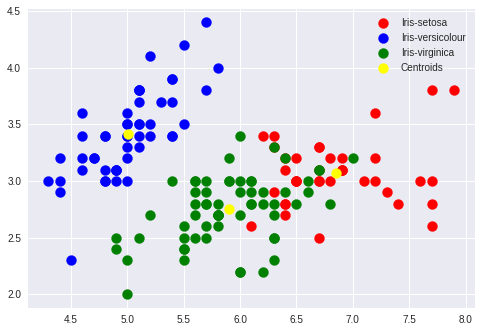

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()